# Generating Airfoils for XFoil

Generating airfoil data using computer-based tools is a common issue. Fortunately, there are many tools we can use. Unfortunately, many of those tools are written in other programming languages. For this study, I used a program that is very popular among model airplane designers: *XFoil*{cite}`drela1989`. This program was originally developed by Mark Drela at MIT as part of the Daedalus Project that built a man-powered airplane that flew over 72 miles in 1988!

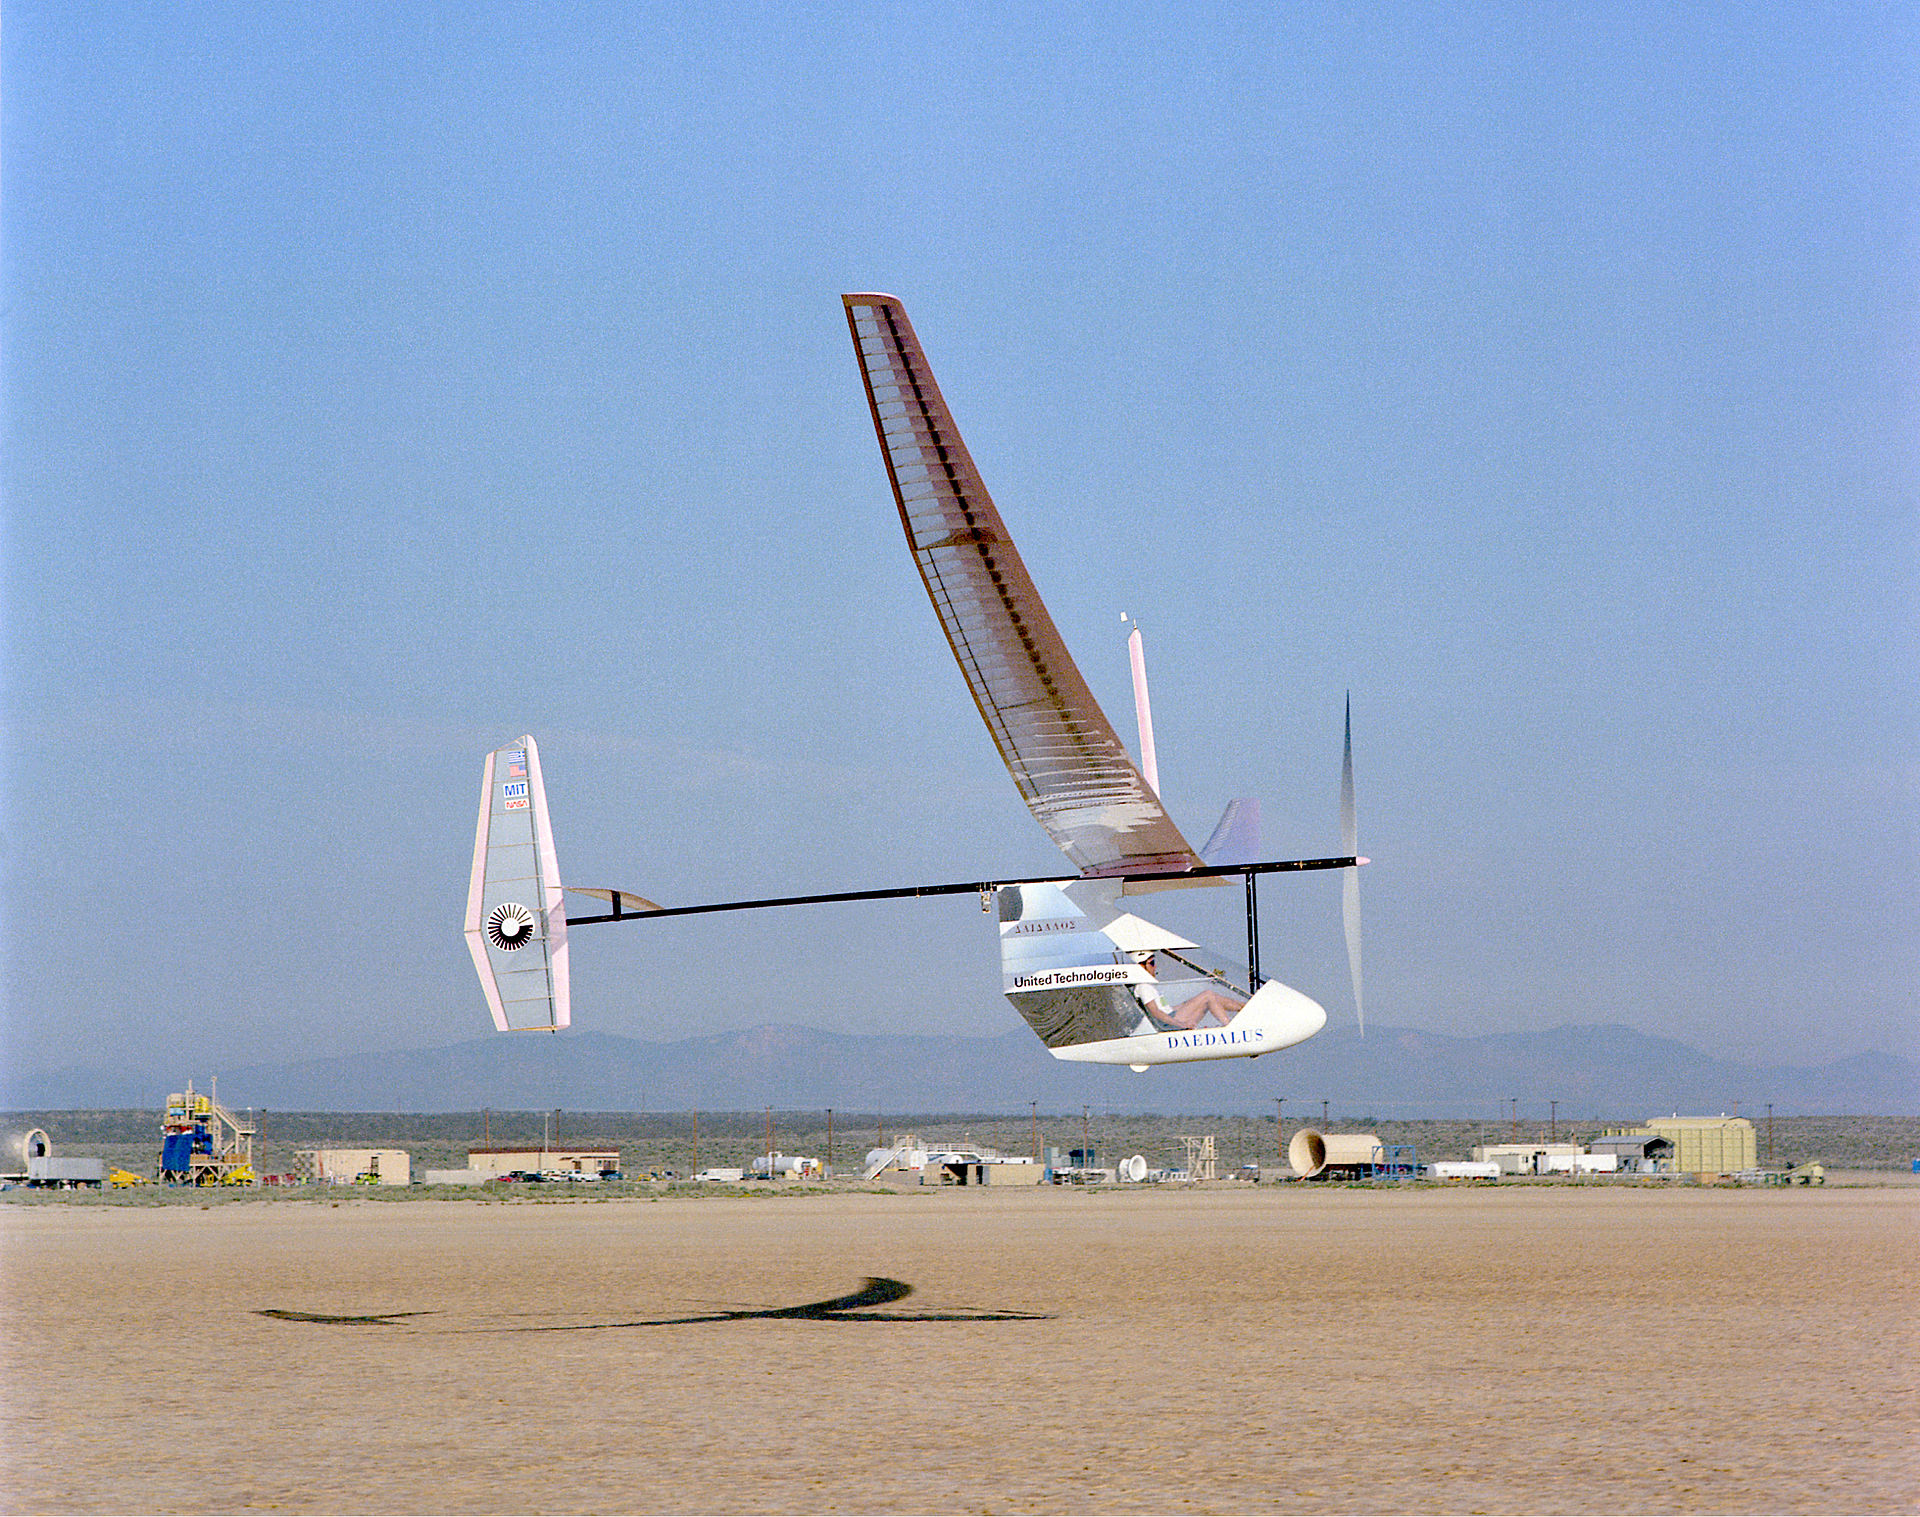

In [1]:
from IPython.display import Image
Image(filename='../../assets/images/Daedalus-human-powered-aircraft.jpeg')

This sure looks like an overgrown indoor model to me!
XFoil was written in Fortran and released into the public domain. The program can be compiled on any system with a modern Fortran compiler. I use the Free Software Foundation’s **gfortran** compiler on my systems. 

I found an interesting project on *GitHub* created by engineers at the by the DARcorporation {cite}`darcorp` that packages *XFoil* so it can be run from a Python program. Getting that running was not something I recommend to beginners, but I am working on that. I will show the results of my work here and refer you to the project website for updates.

I have packaged each airfoil considered for this study into Python classes that will produce a list of points for the camber line based on an input camber, chord length, and number of points desired. We will use those procedures in this section to generate a pseudo-thin airfoil suitable for testing using *XFoil*.

The airfoil shape we will use is not as thin as those we typically use on indoor models. *XFoil* does not like that kind of airfoil. Instead, we will generate an airfoil of some specified thickness and add a round nose at the leading edge, and a short parabolic curve that does not quite close off the trailing edge. Again, *XFoil* works better if we do not generate a sharp point at the trailing edge. These design choices are based on work by Michael Reid{cite}`reid2006` in his Master's Thesis project. Michael used *XFoil* to study thin airfoils with reflexed trailing edges. 

In this section, we will examine a simplex airfoil since that is what the *Wart* actually uses. The code we will use has been include din the project **mmtime** package, so we need to set up access to that code first.

In [2]:
import os
import sys
projdir = os.path.abspath('../..')
if not projdir in sys.path:
    sys.path.insert(0,projdir)

Airfoil management is handled by the **Airfoil** module:

In [3]:
from mmtime.Airfoil import Airfoil

And here is how we create an airfoil for study:

In [4]:
chord = 3
camber = 5 # percent
thickness = 1
npoints = 26
airfoil = Airfoil('simplex', chord, camber, thickness, npoints)

In [5]:
xc,yc = airfoil.get_camber_line()

In [6]:
import matplotlib.pyplot as plt

In [7]:
dydx = airfoil.get_camber_slopes()

Let's take a look at the camber line and local slopes:

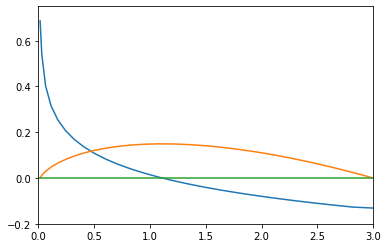

In [8]:
plt.xlim(0, chord)
plt.ylim(-.2, 0.75)
plt.plot(xc[:npoints],dydx)
plt.plot(xc,yc)
plt.plot([0,chord],[0,0])
plt.show()

This next example shows a closeup of the leading edge created for *XFoil* testing:

In [9]:
xule, yule, xlle, ylle = airfoil.get_le()

In [10]:
xu,yu,xl,yl = airfoil.get_surface()


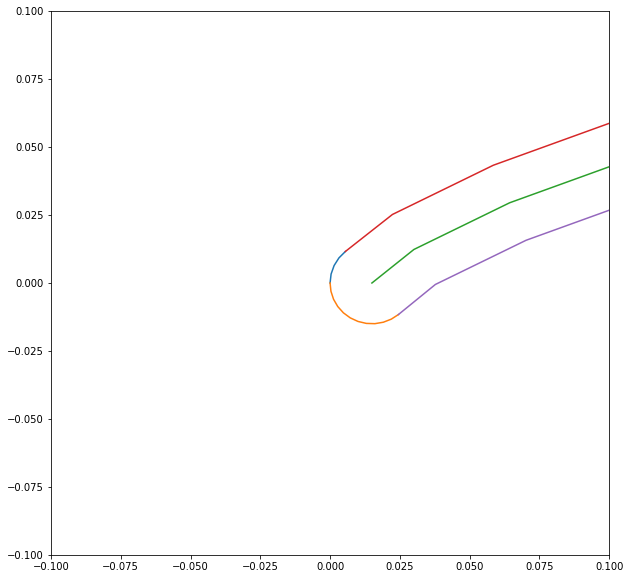

In [11]:
plt.figure(figsize=(10,10))
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.plot(xule,yule)
plt.plot(xlle,ylle)
plt.plot(xc,yc)
plt.plot(xu,yu)
plt.plot(xl,yl)
plt.show()

The trailing edge just uses a simple parabolic arc from a point near the trailing edge to the tip. We leave a tiny gap there to improve *XFOIL*s perfomance.

In [12]:
xute, yute, xlte, ylte = airfoil.get_te()

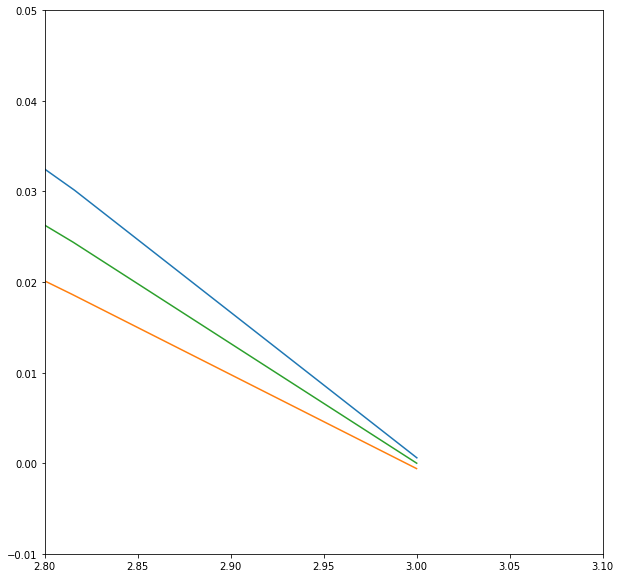

In [13]:
plt.figure(figsize=(10,10))
plt.xlim(2.8, 3.1)
plt.ylim(-0.01, 0.05)
plt.plot(xute,yute)
plt.plot(xlte,ylte)
plt.plot(xc,yc)
plt.plot(xu,yu)
plt.plot(xl,yl)
plt.show()

The scaling of this figure definitely distorts the curves, but you can see the smooth transition and gap at the trailing edge.

Here is the complete airfoil:

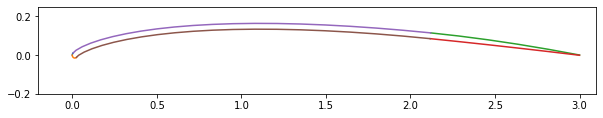

In [14]:
plt.figure(figsize=(10,1.6))
plt.xlim(-0.2, chord+0.1)
plt.ylim(-0.2, camber/100 * chord + 0.1)
#plt.plot(xc,yc)
plt.plot(xule,yule)
plt.plot(xlle,ylle)
plt.plot(xute,yute)
plt.plot(xlte,ylte)
plt.plot(xu,yu)
plt.plot(xl,yl)
plt.show()

For our indoor models, a rounded trailing edge might be more suitable, but Michael reported convergence problems when hr tried to get *XFoil* to analyze airfoils of that type. I may test that later.

This next block creates the final data file needed by *XFoil*. These files are stored in folders with the airfoil name under **mmtime/data/airfoils** in the project code directory. Coefficient data will be placed in the same directory in a later step.

In [17]:
data_dir = os.path.join(projdir,'mmtime/data/airfoils')
airfoil.gen_xfoil_data_file(data_dir)

Generating: /Users/rblack/_dev/live-2022/mmtime/data/airfoils/simplex0501/simplex0501.dat
done...


With the airfoil mechanism set up properly, we can generate a set of simplex airfoils for differing camber values:

In [18]:
chord = 1
thickness = 1
npoints = 51
for camber in range(1,7):
    airfoil = Airfoil('simplex', chord, camber, thickness, npoints)
    airfoil.gen_xfoil_data_file(data_dir)

Generating: /Users/rblack/_dev/live-2022/mmtime/data/airfoils/simplex0101/simplex0101.dat
done...
Generating: /Users/rblack/_dev/live-2022/mmtime/data/airfoils/simplex0201/simplex0201.dat
done...
Generating: /Users/rblack/_dev/live-2022/mmtime/data/airfoils/simplex0301/simplex0301.dat
done...
Generating: /Users/rblack/_dev/live-2022/mmtime/data/airfoils/simplex0401/simplex0401.dat
done...
Generating: /Users/rblack/_dev/live-2022/mmtime/data/airfoils/simplex0501/simplex0501.dat
done...
Generating: /Users/rblack/_dev/live-2022/mmtime/data/airfoils/simplex0601/simplex0601.dat
done...


We now have the airfoils needed to generate aerodynamic coefficients with XFoil. Sadly, we do not have much in the way of experimental data to validate against. 